In [37]:
from matplotlib import dates as mpl_dates
import seaborn as sns
import pandas as pd
from adjustText import adjust_text
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%load_ext autotime
%timeit

class league_summary_report():
    
    def __init__(self):
        
        self.year='2019'
        self.main_header = "Av. Team Sprint Distance by Competition"
        self.cols=['League','Team','Sprinting Distance_mean']
        self.metric='Sprinting Distance_mean'
        self.y_label='Av. Sprinting Distance P90 (m)'
        self.sub_header='2019/20 Season'
        self.sc_image_loc=r'C:\Users\Home\Pictures'
        self.leagues=['ENG Championship','ENG Premier League','GER Bundesliga','FRA Ligue 1','ESP La Liga','UEFA Europa League','ITA Serie A']
        self.teams=['Red Bull Salzburg']
        

    def league_summary(self):

        ### Read the pandas sheet from 2019 summary file ###

        xls = pd.ExcelFile(r'C:\Users\Home\Documents\Skill Corner\Comparison P900 Team Level\P900_'+str(self.year)+'.xlsx')
        Team_Average = pd.read_excel(xls, 'Team_Average')


        #############################################################

        #### Report 1: Sprinting Distance Over Time ####

        #############################################################


        #### Choose Specific Leagues or Specific Teams ####
        SD=Team_Average[self.cols]
        SD_gb=SD.sort_values(by=['League','Sprinting Distance_mean'], ascending=[True,False]).drop_duplicates(subset=['League'], keep='first').reset_index(drop=True)
        
        SD_gb=SD_gb[(SD_gb['League'].isin(self.leagues))|(SD_gb['Team'].isin(self.teams))].reset_index(drop=True)


        # Unique category labels
        color_labels = SD['League'].unique()

        # List of RGB triplets
        rgb_values = sns.color_palette("tab10", 32)

        # Map label to RGB
        color_map = dict(zip(color_labels, rgb_values))


        font = FontProperties()
        csfont = {'fontfamily':'Montserrat'}
        plt.rcParams['font.family'] = 'Montserrat'

        text_color = "white"
        Background = "#0C1B37"
        Background_pop = "#80CBA2"
        Target= "#F6C243"
        Comp_benchmark="#5B9BCB"

        plt.rcParams['xtick.color'] = text_color
        plt.rcParams['ytick.color'] = text_color
        plt.rcParams['xtick.labelsize'] = 20
        plt.rcParams['ytick.labelsize'] = 20


        fig, ax = plt.subplots(figsize=(25,10))


        fig.set_facecolor(Background)
        ax.patch.set_alpha(0)

        #### Adding the scatter point labels ####
        text_color='white'

        x1 = SD_gb['League']
        y1 = SD_gb[self.metric]
        o1 = SD_gb['Team']

        ### Adding League Average vs Time ###
        ax=plt.scatter('League', self.metric, data=SD,zorder=100, c=SD['League'].map(color_map))

        ax=sns.barplot(x='League', y=self.metric, data=SD, color='#80CBA7',zorder=1)

        for i, txt in enumerate(o1):
            ax.annotate(txt, (x1[i], y1[i]+100),color='w', weight='bold', ha='center', va='baseline', size=9,**csfont,zorder=2,
                        bbox=dict(facecolor='black', edgecolor='none', pad=5))

        #### Setting the axis labels ####
        plt.xticks(rotation=90,fontweight='bold')
        ax.set_ylabel(self.y_label, **csfont, fontweight="bold", fontsize=22, color=text_color,labelpad=20)

        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.tick_params(axis='both', which='minor', labelsize=14)

        #### Hiding the spines of the patch added ####

        spines = ["top","right","bottom","left"]
        for s in spines:
            if s in ["top","right"]:
                ax.spines[s].set_visible(False)
            else:
                ax.spines[s].set_color(text_color)


        fig.text(0.30,0.95,self.main_header,fontweight="bold", fontsize=26,**csfont, color=text_color)
        fig.text(0.45,0.915,self.sub_header,fontweight="bold", fontsize=18,**csfont, color=text_color)

        #### Adding Skill corner badge ####
        ax2 = fig.add_axes([0.02,0.9,0.17,0.1]) # badge
        img = mpimg.imread(r'C:\Users\Home\Pictures'\skillcorner.jpg')
        ax2.imshow(img)


        ### Turn off the grids ###
        ax.grid(False)
        ax2.axis("off")
        plt.axis("off")


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 15.9 ms


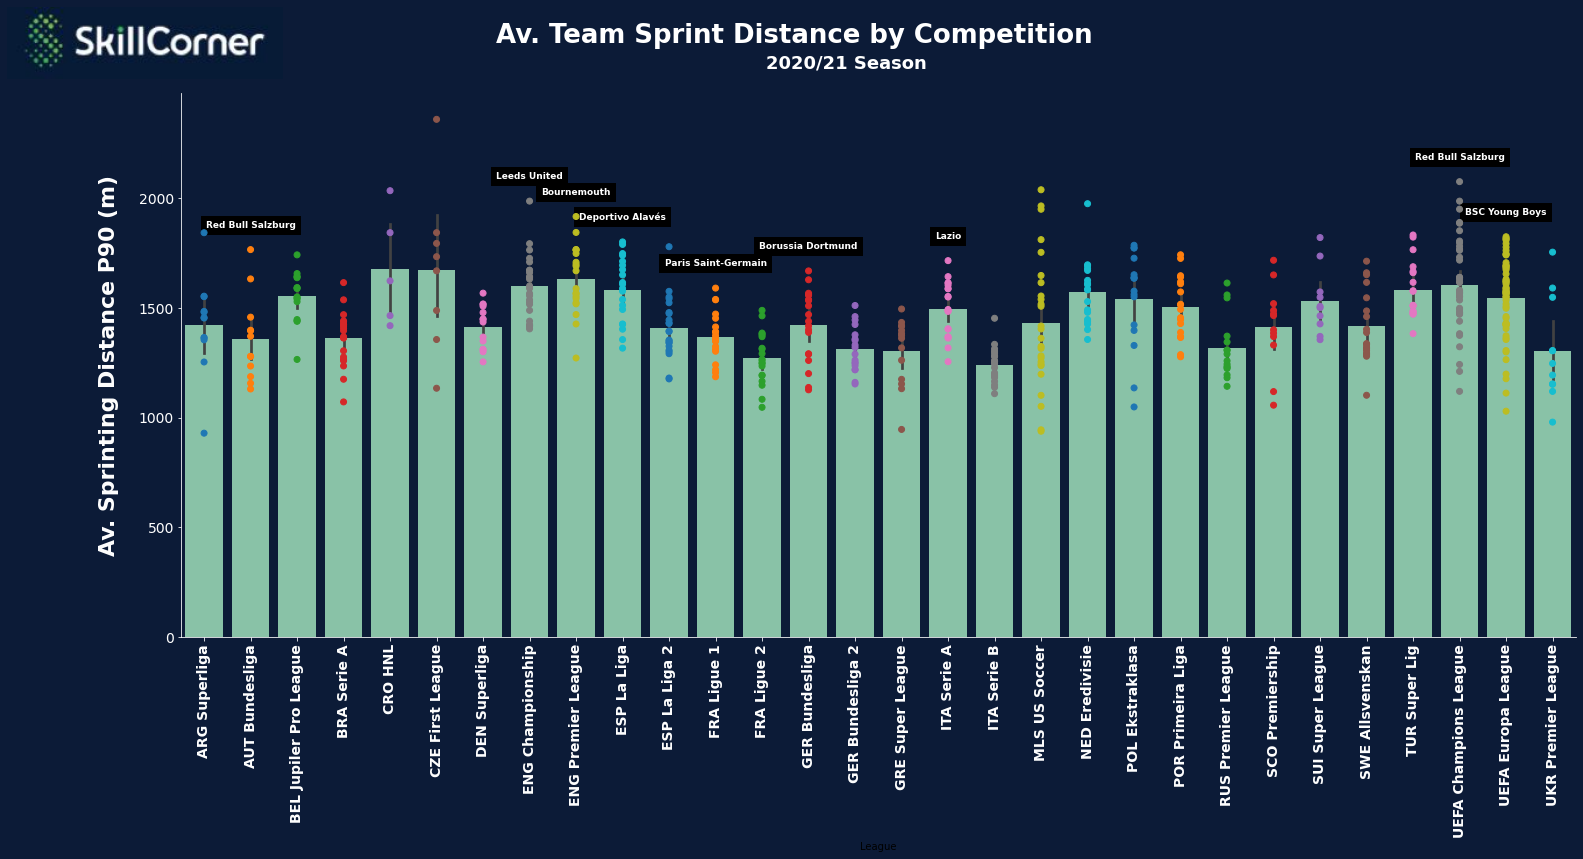

time: 3.18 s


In [38]:
p=league_summary_report()

p.league_summary()